In [1]:
#Lets see which one is the most crowed station. 

In [20]:
import numpy as np 
import pandas as pd
import datetime

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Data/trip.csv")
df.start_date = pd.to_datetime(df.start_date, format='%m/%d/%Y %H:%M') 
df.end_date = pd.to_datetime(df.end_date, format='%m/%d/%Y %H:%M')


In [9]:
#Por resultados anteriores, limpamos el set de datos con viajes mayores a 3 min y menores a 370
df.duration /= 60
df = df[df.duration <= 370]
df = df[df.duration >3]

In [21]:
df.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214


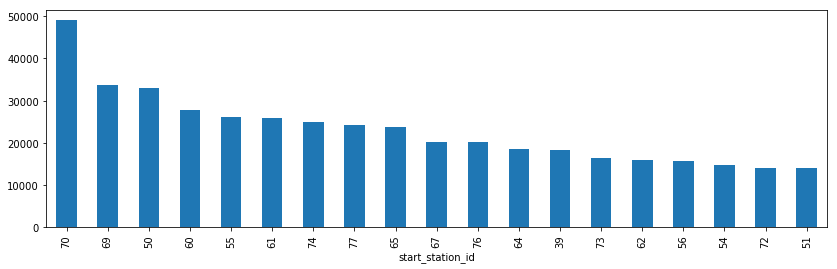

In [27]:
#Cuál es la estación de donde salieron más viajes ? Rta. ID: 70 - buscar nombre
df.groupby('start_station_id').count()['id'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4))

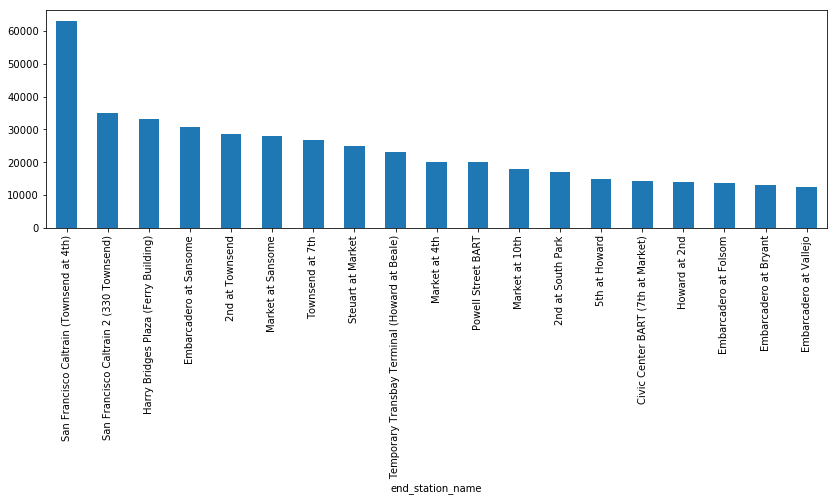

In [28]:
#Cuál es la estación a la que llegaron más viajes? Rta. ID: 70 - buscar nombre
df.groupby('end_station_name').count()['id'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4))

In [ ]:
#Analicemos el tráfico de las estaciones por mes y día de la semana.